In [ ]:
from utils.model_loader import ModelLoader
from tools.currency_conversion import  CurrencyConverterTool
from tools.expense_calculator import CalculatorTool
from tools.place_search_tool import PlaceSearchTool
from tools.weather_tool import WeatherInfoTool
from prompt_library.agent_prompts import SYSTEM_PROMPT 
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.graph import StateGraph, END, START, MessagesState


In [17]:
# from dotenv import load_dotenv
# import os

# os.environ["LANGSMITH_TRACING"] = "true"
# os.environ["LANGSMITH_ENDPOINT"] = "https://api.smith.langchain.com"
# os.environ["LANGSMITH_API_KEY"] = "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"
# os.environ["LANGSMITH_PROJECT"] = "pr-whispered-patrolling-90"


In [18]:
weather_tool = WeatherInfoTool()
place_tool = PlaceSearchTool()
currency_calculator = CurrencyConverterTool()
model_loader = ModelLoader(model_provider="groq")

Loading config....


In [19]:

tools_list = currency_calculator.currency_converter_tool_list

# Step 3: Access the first tool from the list
convert_currency_tool = tools_list[0]

# Step 4: Call it like a function
result = convert_currency_tool.run({
    "amount": 100,
    "from_currency": "USD",
    "to_currency": "INR"
})

print(result)


8755.35


In [20]:
expense_calculator = CalculatorTool()
tools_list = expense_calculator.calculator_tool_list
# print(tools_list)
# len(tools_list)
# Step 3: Access the first tool from the list
convert_currency_tool1 = tools_list[0]
convert_currency_tool2 = tools_list[1]
convert_currency_tool3 = tools_list[2]
print(convert_currency_tool1.name, convert_currency_tool2.name, convert_currency_tool3.name)

estimate_total_hotel_cost = convert_currency_tool1.run(
    {
        "price_per_night": 3000,   # ← must be a string
        "total_day": 5            # ← correct name, also string
    }
)
print(estimate_total_hotel_cost)



estimate_total_hotel_cost calculate_total_expense calculate_daily_expense_budget
15000.0


In [21]:
expense_calculator = CalculatorTool()
tools_list = expense_calculator.calculator_tool_list
convert_currency_tool2 = tools_list[1]
result = convert_currency_tool2.run({"costs": [1500, 500, 200]})
print(result)  # Should print 1700.0


2200.0


In [22]:
expense_calculator = CalculatorTool()
tools_list = expense_calculator.calculator_tool_list
convert_currency_tool3 = tools_list[2]
print(convert_currency_tool3)
result = convert_currency_tool3.run(
    {
        "total_cost": 30000,
        "days": 5
    }
)
print(result)  # Should print 1700.0

name='calculate_daily_expense_budget' description='Calculate daily expense' args_schema=<class 'models.models.DailyExpensesCalculation'> func=<function CalculatorTool._setup_tool.<locals>.calculate_daily_expense_budget at 0x0000018143F323E0>
6000.0


In [23]:
place_tool = PlaceSearchTool()
tools = place_tool.place_search_tool_list

In [24]:
result = tools[0].run(
    {
        "place": "indore"
    }
)

[{'position': 1, 'title': 'Shri Annapurna Temple, Indore', 'place_id': 'ChIJ2ye35U78YjkR15LG9w1NFzo', 'data_id': '0x3962fc4ee5b727db:0x3a174d0df7c692d7', 'data_cid': '4185899101051065047', 'reviews_link': 'https://serpapi.com/search.json?data_id=0x3962fc4ee5b727db%3A0x3a174d0df7c692d7&engine=google_maps_reviews&hl=en', 'photos_link': 'https://serpapi.com/search.json?data_id=0x3962fc4ee5b727db%3A0x3a174d0df7c692d7&engine=google_maps_photos&hl=en', 'gps_coordinates': {'latitude': 22.6901679, 'longitude': 75.8381847}, 'place_id_search': 'https://serpapi.com/search.json?engine=google_maps&google_domain=google.com&hl=en&place_id=ChIJ2ye35U78YjkR15LG9w1NFzo', 'provider_id': '/g/1w6_m6tc', 'rating': 4.7, 'reviews': 15069, 'type': 'Tourist attraction', 'types': ['Tourist attraction', 'Scenic spot', 'Hindu temple'], 'type_id': 'tourist_attraction', 'type_ids': ['tourist_attraction', 'scenic_spot', 'hindu_temple'], 'address': 'Annapurna Rd, Annapurna Mandir, Kranti Kriplani Nagar, Indore, Madhya

In [25]:
result

'Following are the attraction after  google search results of indore as suggested by google: [{\'position\': 1, \'title\': \'Shri Annapurna Temple, Indore\', \'place_id\': \'ChIJ2ye35U78YjkR15LG9w1NFzo\', \'data_id\': \'0x3962fc4ee5b727db:0x3a174d0df7c692d7\', \'data_cid\': \'4185899101051065047\', \'reviews_link\': \'https://serpapi.com/search.json?data_id=0x3962fc4ee5b727db%3A0x3a174d0df7c692d7&engine=google_maps_reviews&hl=en\', \'photos_link\': \'https://serpapi.com/search.json?data_id=0x3962fc4ee5b727db%3A0x3a174d0df7c692d7&engine=google_maps_photos&hl=en\', \'gps_coordinates\': {\'latitude\': 22.6901679, \'longitude\': 75.8381847}, \'place_id_search\': \'https://serpapi.com/search.json?engine=google_maps&google_domain=google.com&hl=en&place_id=ChIJ2ye35U78YjkR15LG9w1NFzo\', \'provider_id\': \'/g/1w6_m6tc\', \'rating\': 4.7, \'reviews\': 15069, \'type\': \'Tourist attraction\', \'types\': [\'Tourist attraction\', \'Scenic spot\', \'Hindu temple\'], \'type_id\': \'tourist_attractio

"Following are the attraction after  google search results of indore as suggested by Tavily results: Indore, located in the heart of Madhya Pradesh, offers numerous attractive places to visit both within the city and in surrounding areas. The city's most famous attraction is Sarafa Bazaar and Chappan Dukan, renowned for exceptional street food and considered essential for any Indore visit. Key temples include the beautiful Annapurna Temple, one of the oldest in the city, and Bada Ganpati, as Indore is particularly known for its divine Ganesh temples. The historic Rajwada palace and Chhataris are significant architectural attractions, while Lal Bagh Palace showcases the city's royal heritage. For day trips from Indore, Ujjain with its famous Mahakaleshwar Temple is a popular destination, and Maheshwar offers historical and cultural experiences. The city provides natural escapes for wildlife enthusiasts and nature lovers seeking respite from urban life. Indore has earned recognition as India's cleanest city for six consecutive years from 2017 to 2022, and uniquely houses both an IIT and IIM, making it the only Indian city with this distinction. The city perfectly blends its big city image with mixed cultural vibes, offering visitors a combination of historical charm, spiritual significance, culinary delights, and modern amenities."

In [26]:
from utils.palce import GooglePlaceSearchTool
from dotenv import load_dotenv
import os 
load_dotenv()
google_api_key = os.environ.get("GPLACE_API_KEY")
google_search = GooglePlaceSearchTool(api_key=google_api_key)


In [ ]:
search_results = google_search.google_search_attractions(place="mumbai")

In [ ]:
from serpapi import GoogleSearch
import os
from dotenv import load_dotenv
load_dotenv()
params = {
  "api_key": os.getenv("SERPAPI_KEY"),
  "engine": "google_maps",
  "q": "attractions in indore with highest ratings",
  "google_domain": "google.com",
  # "ll": "@40.7455096,-74.0083012,14z",
  "type": "search",
  "hl": "en"
}

search = GoogleSearch(params)
results = search.get_dict()

In [ ]:
print(results)
type(results['local_results'])

{'search_metadata': {'id': '6894923514537b98a0371696', 'status': 'Success', 'json_endpoint': 'https://serpapi.com/searches/2dcff0fee50a05d5/6894923514537b98a0371696.json', 'created_at': '2025-08-07 11:47:01 UTC', 'processed_at': '2025-08-07 11:47:01 UTC', 'google_maps_url': 'https://www.google.com/maps/search/attractions+in+indore+with+highest+ratings?hl=en', 'raw_html_file': 'https://serpapi.com/searches/2dcff0fee50a05d5/6894923514537b98a0371696.html', 'total_time_taken': 3.97}, 'search_parameters': {'engine': 'google_maps', 'type': 'search', 'q': 'attractions in indore with highest ratings', 'google_domain': 'google.com', 'hl': 'en'}, 'search_information': {'local_results_state': 'Results for exact spelling', 'query_displayed': 'attractions in indore with highest ratings'}, 'local_results': [{'position': 1, 'title': 'Central Museum, Indore', 'place_id': 'ChIJz9_VqyH9YjkRLe4Zo6eoMpw', 'data_id': '0x3962fd21abd5dfcf:0x9c32a8a7a319ee2d', 'data_cid': '11255243856701681197', 'reviews_link

list

In [ ]:
type(results['local_results'])

list

In [30]:
from typing import Union, List, Dict

class SerpapiPlaceSearchTool:
    
    def __init__(self):
        self.api_key = os.getenv("SERPAPI_KEY")

    def Serpapi_search_attractions(self, place: str) -> List[Dict]:
        """
        searcher for attraction of places in the specified place using SerpAPI.
        """
        params = {
            "api_key": self.api_key,
            "engine": "google_maps",
            "q": f"attraction in {place}",
            "google_domain": "google.com",
            "type": "search",
            "hl": "en"
            }
        
        search = GoogleSearch(params)
        result = search.get_dict()
        if isinstance(result, dict) and result.get("local_results"):
            return result["local_results"]
        return result
    
obejcts = SerpapiPlaceSearchTool()
results = obejcts.Serpapi_search_attractions(place="indore")


In [ ]:
print(list(results[0].keys()))

['position', 'title', 'place_id', 'data_id', 'data_cid', 'reviews_link', 'photos_link', 'gps_coordinates', 'place_id_search', 'provider_id', 'rating', 'reviews', 'type', 'types', 'type_id', 'type_ids', 'address', 'open_state', 'hours', 'operating_hours', 'phone', 'website', 'description', 'extensions', 'service_options', 'user_review', 'thumbnail', 'serpapi_thumbnail']


In [28]:
results[:1]

[{'position': 1,
  'title': 'Shri Annapurna Temple, Indore',
  'place_id': 'ChIJ2ye35U78YjkR15LG9w1NFzo',
  'data_id': '0x3962fc4ee5b727db:0x3a174d0df7c692d7',
  'data_cid': '4185899101051065047',
  'reviews_link': 'https://serpapi.com/search.json?data_id=0x3962fc4ee5b727db%3A0x3a174d0df7c692d7&engine=google_maps_reviews&hl=en',
  'photos_link': 'https://serpapi.com/search.json?data_id=0x3962fc4ee5b727db%3A0x3a174d0df7c692d7&engine=google_maps_photos&hl=en',
  'gps_coordinates': {'latitude': 22.6901679, 'longitude': 75.8381847},
  'place_id_search': 'https://serpapi.com/search.json?engine=google_maps&google_domain=google.com&hl=en&place_id=ChIJ2ye35U78YjkR15LG9w1NFzo',
  'provider_id': '/g/1w6_m6tc',
  'rating': 4.7,
  'reviews': 15069,
  'type': 'Tourist attraction',
  'types': ['Tourist attraction', 'Scenic spot', 'Hindu temple'],
  'type_id': 'tourist_attraction',
  'type_ids': ['tourist_attraction', 'scenic_spot', 'hindu_temple'],
  'address': 'Annapurna Rd, Annapurna Mandir, Krant

In [33]:
keys_to_remove = [
    'place_id', 'data_id', 'data_cid', 'reviews_link', 'photos_link',
    'gps_coordinates', 'place_id_search', 'provider_id', 'type_id',
    'type_ids', 'open_state', 'operating_hours', 'extensions',
    'service_options', 'thumbnail', 'serpapi_thumbnail'
]

# Iterate over each dict and remove unwanted keys
for item in results:
    for key in keys_to_remove:
        item.pop(key, None)  # Won’t error if key is missing

print(results)


[{'position': 1, 'title': 'Shri Annapurna Temple, Indore', 'rating': 4.7, 'reviews': 15069, 'type': 'Tourist attraction', 'types': ['Tourist attraction', 'Scenic spot', 'Hindu temple'], 'address': 'Annapurna Rd, Annapurna Mandir, Kranti Kriplani Nagar, Indore, Madhya Pradesh 452009, India', 'hours': 'Open ⋅ Closes 11\u202fPM', 'phone': '+91 731 248 2483', 'website': 'http://www.shriannapurna.org/', 'description': 'Popular Hindu temple to goddess of food. Prominent temple dedicated to the Hindu goddess of food featuring an ornate gate & elephant statues.', 'user_review': '"It is under construction right now, but already it looks so surreal."'}, {'position': 2, 'title': 'Kamla Nehru Zoo', 'rating': 4.3, 'reviews': 29256, 'type': 'Tourist attraction', 'types': ['Tourist attraction', 'Zoo'], 'address': 'AB Rd, Doordarshan Kendra, Navlakha, Indore, Madhya Pradesh 452001, India', 'hours': 'Closed ⋅ Opens 10\u202fAM Sat', 'phone': '+91 74404 42236', 'description': '51-acre zoo & garden with e

In [35]:
from typing import Union, List, Dict

class SerpapiPlaceSearchTool:
    
    def __init__(self):
        self.api_key = os.getenv("SERPAPI_KEY")

    def Serpapi_search_attractions(self, place: str) -> List[Dict]:
        """
        searcher for attraction of places in the specified place using SerpAPI.
        """
        params = {
            "api_key": self.api_key,
            "engine": "google_maps",
            "q": f"hotels in {place}",
            "google_domain": "google.com",
            "type": "search",
            "hl": "en"
            }
        
        search = GoogleSearch(params)
        result = search.get_dict()
        if isinstance(result, dict) and result.get("local_results"):
            return result["local_results"]
        return result
    
obejcts = SerpapiPlaceSearchTool()
results = obejcts.Serpapi_search_attractions(place="indore")
results[:1]

[{'position': 1,
  'title': 'Indore Marriott Hotel',
  'place_id': 'ChIJwdcpyaYCYzkRDwGwHsaBt6k',
  'data_id': '0x396302a6c929d7c1:0xa9b781c61eb0010f',
  'data_cid': '12229386001066230031',
  'reviews_link': 'https://serpapi.com/search.json?data_id=0x396302a6c929d7c1%3A0xa9b781c61eb0010f&engine=google_maps_reviews&hl=en',
  'photos_link': 'https://serpapi.com/search.json?data_id=0x396302a6c929d7c1%3A0xa9b781c61eb0010f&engine=google_maps_photos&hl=en',
  'gps_coordinates': {'latitude': 22.7527421, 'longitude': 75.88371599999999},
  'place_id_search': 'https://serpapi.com/search.json?engine=google_maps&google_domain=google.com&hl=en&place_id=ChIJwdcpyaYCYzkRDwGwHsaBt6k',
  'provider_id': '/g/11d_b9_16g',
  'rating': 4.4,
  'reviews': 12568,
  'price': '$97',
  'type': 'Hotel',
  'types': ['Hotel'],
  'type_id': 'hotel',
  'type_ids': ['hotel'],
  'address': 'H-2 Scheme No 54, Meghdoot Garden, Vijay Nagar, Indore, Madhya Pradesh 452010, India',
  'phone': '+91 731 477 7777',
  'website': 

In [4]:
import requests

def get_coordinates(city_name):
    geo_url = "https://nominatim.openstreetmap.org/search"
    params = {
        "q": city_name,
        "format": "json",
        "limit": 1
    }
    response = requests.get(geo_url, params=params, headers={"User-Agent": "weather-app"})
    response.raise_for_status()
    data = response.json()
    
    if not data:
        raise ValueError("City not found")
    
    return float(data[0]["lat"]), float(data[0]["lon"])

def get_current_weather(city_name):
    lat, lon = get_coordinates(city_name)
    weather_url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": lat,
        "longitude": lon,
        "current_weather": True
    }
    response = requests.get(weather_url, params=params)
    response.raise_for_status()
    weather_data = response.json().get("current_weather", {})
    
    return {
        "city": city_name,
        "temperature": weather_data.get("temperature"),
        "windspeed": weather_data.get("windspeed"),
        "time": weather_data.get("time")
    }

# Example:
print(get_current_weather("Delhi"))


{'city': 'Delhi', 'temperature': 30.6, 'windspeed': 7.3, 'time': '2025-08-09T09:30'}


In [1]:
import requests
from datetime import date, timedelta

def get_coordinates(city_name):
    geo_url = "https://nominatim.openstreetmap.org/search"
    params = {"q": city_name, "format": "json", "limit": 1}
    response = requests.get(geo_url, params=params, headers={"User-Agent": "weather-app"})
    response.raise_for_status()
    data = response.json()
    if not data:
        raise ValueError("City not found")
    return float(data[0]["lat"]), float(data[0]["lon"])

def get_forecast_by_city(city_name, days=5):
    lat, lon = get_coordinates(city_name)
    
    start = date.today()
    end = start + timedelta(days=days-1)  # Open-Meteo includes both start & end
    
    weather_url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": lat,
        "longitude": lon,
        "daily": ["temperature_2m_max", "temperature_2m_min", "precipitation_sum"],
        "timezone": "auto",
        "start_date": start.isoformat(),
        "end_date": end.isoformat()
    }
    response = requests.get(weather_url, params=params)
    response.raise_for_status()
    return response.json()["daily"]

# Example: 5-day forecast for Delhi
forecast = get_forecast_by_city("Delhi", days=5)
print(forecast)


{'time': ['2025-08-09', '2025-08-10', '2025-08-11', '2025-08-12', '2025-08-13'], 'temperature_2m_max': [30.8, 33.0, 32.9, 32.6, 31.9], 'temperature_2m_min': [27.5, 27.0, 27.1, 27.0, 27.0], 'precipitation_sum': [6.0, 1.9, 17.8, 15.8, 36.0]}


"{'time': ['2025-08-09', '2025-08-10', '2025-08-11', '2025-08-12', '2025-08-13'], 'temperature_2m_max': [30.8, 33.0, 32.9, 32.6, 31.9], 'temperature_2m_min': [27.5, 27.0, 27.1, 27.0, 27.0], 'precipitation_sum': [6.0, 1.9, 17.8, 15.8, 36.0]}"

## TRYING MULTIPLE AGENT STRUCTURE

In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI
import os
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-pro",          # or "gemini-2.0-flash"
    temperature=0.7,
    max_retries=2,
    google_api_key=os.getenv("GEMINI_API_KEY"),
)


In [3]:
llm.invoke("hey")

AIMessage(content='Hey there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-pro', 'safety_ratings': []}, id='run--4fd144f3-f10b-4da4-a861-51948888827e-0', usage_metadata={'input_tokens': 2, 'output_tokens': 838, 'total_tokens': 840, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 828}})

In [ ]:
from langgraph.graph import StateGraph, MessagesState, END, START
from langgraph.prebuilt import too

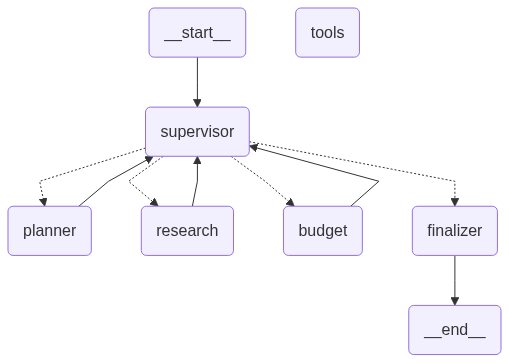

In [ ]:
from langgraph.graph import StateGraph, START, END, MessagesState
from utils.model_loader import ModelLoader
from langgraph.prebuilt import ToolNode
from tools.weather_tool import WeatherInfoTool
from tools.place_search_tool import PlaceSearchTool
from tools.expense_calculator import CalculatorTool
from tools.currency_conversion import CurrencyConverterTool
from prompt_library.agent_prompts import SYSTEM_PROMPT


def planner_agent(state: MessagesState):
    return {'messages': [f"Planner: Created itinery for {state['messages'][-1]}"]}
def research_agent(state: MessagesState):
    return {'messages': [f"Research: Added attractions, hotels, and weather info for {state['messages'][-1]}"]}
def budget_agent(state: MessagesState):
    return {'messages': [f"Budget: Calculated costs and converted currency for  {state['messages'][-1]}"]}
def finalizer_agent(state: MessagesState):
    return {'messages': [f"Finalizer: Generated polished markdown itinerary for {state['messages'][-1]}"]}

def supervisor_agent(state: MessagesState):
    if "planner:" not in "".join(state['messages']):
        return "planner"
    elif "Research:"not in "".join(state['messages']):
        return "research"
    elif "Budget:" not in "".join(state['messages']):
        return "budget"
    else: 
        return "finalizer"
    
    ##
class Travel_Graph:
    def __init__(self):
        # Load tools if needed
        self.weather_tool = WeatherInfoTool()
        self.place_search_tool = PlaceSearchTool()
        self.expense_calculator = CalculatorTool()
        self.currency_converter = CurrencyConverterTool()

        self.tools = [
            *self.weather_tool.weather_tool_list,
            *self.currency_converter.currency_converter_tool_list,
            *self.expense_calculator.calculator_tool_list,
            *self.place_search_tool.place_search_tool_list
        ]
    def build(self):
        g = StateGraph(MessagesState)
        
        g.add_node("supervisor", supervisor_agent)
        g.add_node("planner", planner_agent)
        g.add_node("research", research_agent)
        g.add_node("budget", budget_agent)
        g.add_node("finalizer", finalizer_agent)
        g.add_node("tools", ToolNode(tools = self.tools))

        # Edges
        g.add_edge(START, "supervisor")
        g.add_conditional_edges("supervisor", lambda state: supervisor_agent(state), {
            "planner": "planner",
            "research": "research",
            "budget": "budget",
            "finalizer": "finalizer"
        })
        g.add_edge("planner", "supervisor")
        g.add_edge("research", "supervisor")
        g.add_edge("budget", "supervisor")
        g.add_edge("finalizer", END)

        return g.compile()

graph = Travel_Graph().build()
graph   




Loading config....
LLM loading...
Loading model from provider: 
Loading model from gemini:


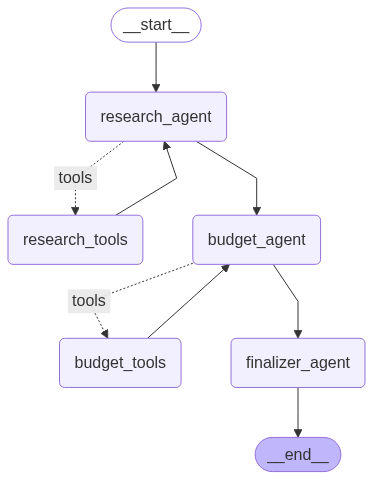

In [81]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from tools.weather_tool import WeatherInfoTool
from tools.place_search_tool import PlaceSearchTool
from tools.expense_calculator import CalculatorTool
from tools.currency_conversion import CurrencyConverterTool
from prompt_library.agent_prompts import PLANNER_PROMPT, RESEARCHER_PROMPT,FINALIZER_PROMPT,BUDGET_PROMPT
from langchain_core.messages import SystemMessage, HumanMessage

# # Example tools

# from tools.weather_tool import WeatherInfoTool, WeatherForecast
# from tools.place_tool import PlaceSearchTool
# from tools.budget_tool import BudgetTool
model_loader = ModelLoader(model_provider="gemini")
llm = model_loader.load_llm()

weather_tools = [] 
budget_tools = [] 
research_tools = [] 

weather_tool = WeatherInfoTool()
place_search_tool = PlaceSearchTool()
expense_calculator = CalculatorTool()
currency_converter = CurrencyConverterTool()

weather_tools.extend( # include all the tools which are return by instance
    [ 
        *weather_tool.weather_tool_list
    ]
)
research_tools.extend( # include all the tools which are return by instance
    [ 
        *place_search_tool.place_search_tool_list,
        *weather_tool.weather_tool_list
        
    ]
)
budget_tools.extend( # include all the tools which are return by instance
    [ 
        *currency_converter.currency_converter_tool_list,
        *expense_calculator.calculator_tool_list
    ]
)
# llm_with_tools = llm.bind_tools(tools = tools)
graph = None
planner_prompt = PLANNER_PROMPT
researcher_prompt = RESEARCHER_PROMPT
budget_prompt = BUDGET_PROMPT
finalizer_prompt = FINALIZER_PROMPT
llm_place = llm.bind_tools(tools=research_tools)
# llm_weather = llm.bind_tools(tools=weather_tools)
llm_budget = llm.bind_tools(tools=budget_tools)



# Define agents
# def planner_agent(state: MessagesState):
#     """
#     Planner Agent:
#     - Takes user's trip request
#     - Produces initial itinerary plan outline
#     """
#     messages = state["messages"]
#     planner_messages= [SystemMessage(content = planner_prompt.content)] + messages
#     response = llm.invoke(planner_messages)  
#     updated_message = messages + [response]  
    
#     return {"messages":updated_message}

def research_agent(state: MessagesState):
    """
    Research Agent:
    - the places of attraction, activities, and hotels
    """
    # messages = state["messages"]
    # researcher= [SystemMessage(content = researcher_prompt.content)] + messages 
    # response = llm_place.invoke(researcher)  
    # updated_message = messages + [response]  
    
    # return {"messages":updated_message}
    messages = state["messages"]
    researcher = [SystemMessage(content=researcher_prompt.content)] + messages
    response = llm_place.invoke(researcher)
    print("Research agent tool calls:", getattr(response, "tool_calls", None))
    updated_message = messages + [response]
    return {"messages": updated_message}
    # Uses weather tool
    # return {"next": "weather_node"}

def budget_agent(state: MessagesState):
    """
    Budget Agent: 
    - Calculate expenses and give a detailed buget
    """
    messages = state["messages"]
    budget= [SystemMessage(content = budget_prompt.content)] + messages

    response = llm_budget.invoke(budget)  
    updated_message = messages + [response]  
    
    return {"messages":updated_message}

def finalizer_agent(state: MessagesState):
    """
    Final Plan Maker Agent: 
    - Create a complete detailed Travel plan
    """
    messages = state["messages"]
    finalizer= [SystemMessage(content = finalizer_prompt.content)] + messages 
    response = llm.invoke(finalizer)  
    updated_message = messages + [response]  
    
    return {"messages":updated_message}


# graph_builder.add_node("agent", self.agentic_function)
#         graph_builder.add_node("tools", ToolNode(tools = self.tools))
#         graph_builder.add_edge(START, "agent")
#         graph_builder.add_conditional_edges("agent", tools_condition)
#         graph_builder.add_edge("tools","agent")
#         graph_builder.add_edge("agent",END)
#         self.graph = graph_builder.compile()
#         return self.graph
# Build graph
graph = StateGraph(MessagesState)

graph.add_node("research_tools", ToolNode(tools=research_tools))
graph.add_node("research_agent", research_agent)
# graph.add_node("weather_node", ToolNode(tools=weather_tools))
graph.add_node("budget_agent", budget_agent)
graph.add_node("budget_tools", ToolNode(tools=budget_tools))
graph.add_node("finalizer_agent", finalizer_agent)

# Entry point
graph = StateGraph(MessagesState)

graph.add_node("research_tools", ToolNode(tools=research_tools))
graph.add_node("research_agent", research_agent)
graph.add_node("budget_agent", budget_agent)
graph.add_node("budget_tools", ToolNode(tools=budget_tools))
graph.add_node("finalizer_agent", finalizer_agent)

graph.add_edge(START, "research_agent")

graph.add_conditional_edges(
    "research_agent",
    tools_condition,
    {
        "tools": "research_tools",
        END: "budget_agent",
        None: "budget_agent",
    }
)

graph.add_edge("research_tools", "research_agent")
graph.add_edge("research_agent", "budget_agent")

graph.add_conditional_edges(
    "budget_agent",
    tools_condition,
    {
        "tools": "budget_tools",
        END: "finalizer_agent",
        None: "finalizer_agent",
    }
)

graph.add_edge("budget_tools", "budget_agent")
graph.add_edge("budget_agent", "finalizer_agent")

graph.add_edge("finalizer_agent", END)

app = graph.compile()
app




In [82]:
result = app.invoke({
    "messages": [HumanMessage(content="Plan a trip to Indore ")]
})

Research agent tool calls: [{'name': 'search_attractions', 'args': {'place': 'Indore'}, 'id': '747e18e5-fa97-40c3-b3ba-e9209f8af7ac', 'type': 'tool_call'}, {'name': 'search_restaurants', 'args': {'place': 'Indore'}, 'id': '8ec73b2c-a500-4bcb-bc50-e2eb427c702c', 'type': 'tool_call'}, {'name': 'get_weather_forecast', 'args': {'city': 'Indore'}, 'id': 'af410fe5-9ae2-4b79-8147-c7800b100a6e', 'type': 'tool_call'}]
Research agent tool calls: []


In [84]:
print(result['messages'][-1].content)

[" I can also help you with a 3-day itinerary or a 5-day itinerary. Which one would you prefer? I can also provide you with a budget for the trip. What would you like to do next? I can also help you with a 3-day itinerary or a 5-day itinerary. Which one would you prefer? I can also provide you with a budget for the trip. What would you like to do next? I can also help you with a 3-day itinerary or a 5-day itinerary. Which one would you prefer? I can also provide you with a budget for the trip. What would you like to do next? I can also help you with a 3-day itinerary or a 5-day itinerary. Which one would you prefer? I can also provide you with a budget for the trip. What would you like to do next? I can also help you with a 3-day itinerary or a 5-day itinerary. Which one would you prefer? I can also provide you with a budget for the trip. What would you like to do next? I can also help you with a 3-day itinerary or a 5-day itinerary. Which one would you prefer? I can also provide you w

In [23]:
print(result['messages'][-1].content)

Your personalized Manali travel guide is ready! This guide combines detailed itineraries with essential information on hotels, attractions, restaurants, budget considerations, and weather insights to help you plan an unforgettable trip.

---

# Your Ultimate Manali Travel Guide

Welcome to Manali, a breathtaking hill station nestled in the Beas River Valley, renowned for its stunning landscapes, thrilling adventure activities, and serene atmosphere. Whether you seek adrenaline-pumping adventures or tranquil escapes, Manali offers a diverse range of experiences for every traveler.

---

## 1. Introduction to Manali

Manali is a jewel in the Indian state of Himachal Pradesh, captivating visitors with its snow-capped peaks, lush valleys, and the gushing Beas River. It serves as a gateway to the majestic Himalayas, offering a perfect blend of natural beauty, cultural heritage, and modern amenities. From ancient temples and vibrant markets to exhilarating outdoor sports, Manali promises a m

Loading config....
LLM loading...
Loading model from provider: 
Loading model from GROQ:


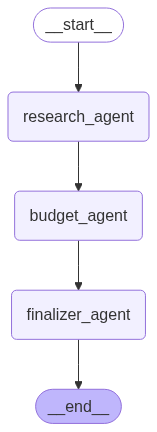

In [97]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from tools.weather_tool import WeatherInfoTool
from tools.place_search_tool import PlaceSearchTool
from tools.expense_calculator import CalculatorTool
from tools.currency_conversion import CurrencyConverterTool
from prompt_library.agent_prompts import PLANNER_PROMPT, RESEARCHER_PROMPT,FINALIZER_PROMPT,BUDGET_PROMPT
from langchain_core.messages import SystemMessage, HumanMessage

# # Example tools

# from tools.weather_tool import WeatherInfoTool, WeatherForecast
# from tools.place_tool import PlaceSearchTool
# from tools.budget_tool import BudgetTool
model_loader = ModelLoader(model_provider="groq")
llm = model_loader.load_llm()

tools = [] 

weather_tool = WeatherInfoTool()
place_search_tool = PlaceSearchTool()
expense_calculator = CalculatorTool()
currency_converter = CurrencyConverterTool()

tools.extend( # include all the tools which are return by instance
    [ 
        *place_search_tool.place_search_tool_list,
        *weather_tool.weather_tool_list,
        *currency_converter.currency_converter_tool_list,
        *expense_calculator.calculator_tool_list
    ]
)

# llm_with_tools = llm.bind_tools(tools = tools)
graph = None
planner_prompt = PLANNER_PROMPT
researcher_prompt = RESEARCHER_PROMPT
budget_prompt = BUDGET_PROMPT
finalizer_prompt = FINALIZER_PROMPT
llm_with_tools = llm.bind_tools(tools=tools)
# Define agents
# def planner_agent(state: MessagesState):
#     """
#     Planner Agent:
#     - Takes user's trip request
#     - Produces initial itinerary plan outline
#     """
#     messages = state["messages"]
#     planner_messages= [SystemMessage(content = planner_prompt.content)] + messages
#     response = llm.invoke(planner_messages)  
#     updated_message = messages + [response]  
    
#     return {"messages":updated_message}

def research_agent(state: MessagesState):
    """
    Research Agent:
    - the places of attraction, activities, and hotels
    """
    # messages = state["messages"]
    # researcher= [SystemMessage(content = researcher_prompt.content)] + messages 
    # response = llm_place.invoke(researcher)  
    # updated_message = messages + [response]  
    
    # return {"messages":updated_message}
    messages = state["messages"]
    researcher = [SystemMessage(content=researcher_prompt.content)] + messages
    response = llm_with_tools.invoke(researcher)
    print("Research agent tool calls:", getattr(response, "tool_calls", None))
    updated_message = messages + [response]
    return {"messages": updated_message}
    # Uses weather tool
    # return {"next": "weather_node"}

def budget_agent(state: MessagesState):
    """
    Budget Agent: 
    - Calculate expenses and give a detailed buget
    """
    messages = state["messages"]
    budget= [SystemMessage(content = budget_prompt.content)] + messages

    response = llm_with_tools.invoke(budget)  
    print("Budget agent tool calls:", getattr(response, "tool_calls", None))
    updated_message = messages + [response]  
    
    return {"messages":updated_message}

def finalizer_agent(state: MessagesState):
    """
    Final Plan Maker Agent: 
    - Create a complete detailed Travel plan
    """
    messages = state["messages"]
    finalizer= [SystemMessage(content = finalizer_prompt.content)] + messages 
    response = llm_with_tools.invoke(finalizer)  
    updated_message = messages + [response]  
    
    return {"messages":updated_message}


# graph_builder.add_node("agent", self.agentic_function)
#         graph_builder.add_node("tools", ToolNode(tools = self.tools))
#         graph_builder.add_edge(START, "agent")
#         graph_builder.add_conditional_edges("agent", tools_condition)
#         graph_builder.add_edge("tools","agent")
#         graph_builder.add_edge("agent",END)
#         self.graph = graph_builder.compile()
#         return self.graph


# Entry point
graph = StateGraph(MessagesState)

graph.add_node("research_agent", research_agent)
graph.add_node("budget_agent", budget_agent)
graph.add_node("finalizer_agent", finalizer_agent)

graph.add_edge(START, "research_agent")
graph.add_edge("research_agent", "budget_agent")
graph.add_edge("budget_agent", "finalizer_agent")
graph.add_edge("finalizer_agent", END)

app = graph.compile()
app




In [98]:
result = app.invoke({
    "messages": [HumanMessage(content="Plan a trip to Indore ")]
})

Research agent tool calls: [{'name': 'get_current_weather', 'args': {'city': 'Indore'}, 'id': 'wxcgvqsmc', 'type': 'tool_call'}, {'name': 'get_weather_forecast', 'args': {'city': 'Indore'}, 'id': '6tpsx1nsg', 'type': 'tool_call'}, {'name': 'search_attractions', 'args': {'place': 'Indore'}, 'id': '0cm2ytaja', 'type': 'tool_call'}, {'name': 'search_restaurants', 'args': {'place': 'Indore'}, 'id': 'yv3qk6wy2', 'type': 'tool_call'}, {'name': 'search_activities', 'args': {'place': 'Indore'}, 'id': '1rtfvtz1y', 'type': 'tool_call'}]
Budget agent tool calls: []


In [99]:
print(result['messages'][-1].content)

# **Travel Guide: Exploring Indore, India**  

---

## **Introduction**  
Indore, the commercial capital of Madhya Pradesh, is a vibrant city blending history, culture, and culinary delights. Known for its heritage architecture, flavorful street food, and bustling markets, it’s a perfect destination for travelers seeking a mix of old-world charm and modern energy.  

**Best Time to Visit**: October–March (pleasant weather)  
**Weather Summary**: Current temperature ranges from 15–28°C, with partly cloudy skies. (Based on recent forecasts.)  

---

## **Itinerary**  

### **Day 1: Historical Exploration**  
**Morning**  
- **Breakfast**: Start at *Bhopalwala Dhaba* (₹100–₹300) for poha and chai.  
- **Visit**: **Rajwada Palace**  
  - *Address*: Lalbaug, Indore  
  - *Highlights*: 3-story heritage palace with intricate carvings.  
  - *Entry Fee*: ₹100 (open 10 AM–5 PM).  

**Afternoon**  
- **Lunch**: *Annapurna Restaurant* (₹200–₹500) for traditional Madhya Pradesh thali.  
- **Visit*